In [77]:
!pip install seaborn

# Chang Woon Jang

Netflix dataset (netflix_titles.csv [1]) from Kaggle was used to analyze the production of movies and TV shows. This analysis shows the trend of netflix production in the past from 2006 to 2021. 

    * Trend of Netflix TV shows and Movie produced in the past from 2006 to 2021. (bar chart) 
    
    
Refereces

[1] Netflix Movies and TV Shows, accessed 09 May 2022, <https://www.kaggle.com/datasets/shivamb/netflix-shows>

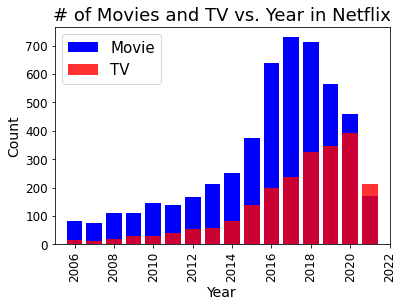

In [110]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import re

netflix = pd.read_csv("./Resources/netflix_titles.csv")

# Drop columns that is not needed
netflix_df = netflix[['type', 'release_year', 'country']]
netflix_df = netflix_df.dropna(axis=0)

# list of movie and tv by year and type
movie_maps = []
tv_maps = []

# Store Type and Year into lists of movie_maps and tv_maps 
for index, row in netflix_df.iterrows():
    if netflix_df.loc[index, 'release_year'] > 2005 and netflix_df.loc[index, 'type'] == "Movie":
        
        movie_maps.append([netflix_df.loc[index, 'release_year'], netflix_df.loc[index, 'type']])
        
    elif netflix_df.loc[index, 'release_year'] > 2005 and netflix_df.loc[index, 'type'] == "TV Show":
        
        tv_maps.append([netflix_df.loc[index, 'release_year'], netflix_df.loc[index, 'type']])

# data frame for TV and Movie
tv_df = pd.DataFrame(tv_maps)
movie_df = pd.DataFrame(movie_maps)

# Group by Year and Count number of TV Shows and Movies
groupby_tv = tv_df.groupby(0).count().reset_index() 
groupby_movie = movie_df.groupby(0).count().reset_index() 

# Merge Group by TV Shows and Movies into DataFrame
merge_df = groupby_tv.merge(groupby_movie, left_on=0, right_on=0)
merge_df.rename(columns = {0:'Year', '1_x':'TV', '1_y':'Movie'}, inplace = True)

# Matplot bar graph of Movie and TV counts by Year
plt.bar(merge_df['Year'], merge_df['Movie'], color='b')
plt.bar(merge_df['Year'], merge_df['TV'], color='r', alpha=0.8)

plt.xlabel("Year", size=14)
plt.xticks(fontsize=12, rotation=90)
plt.xlim(2005, 2022)
plt.ylabel("Count", size=14)
plt.yticks(fontsize=12)
plt.title("# of Movies and TV vs. Year in Netflix", size=18)

plt.legend(['Movie', 'TV'], loc='upper left', fontsize=15)

plt.savefig("./Images/Movie-TV-Count-By-Year.png");


#  Ratio of TV shows to Movie. (line graph)
    
    * In this analysis, the ratio of TV show to movie is shown from 2016 to 2021. From 2017, the ratio drastically 
    increases, indicating that the tv show is more produced than movie. 

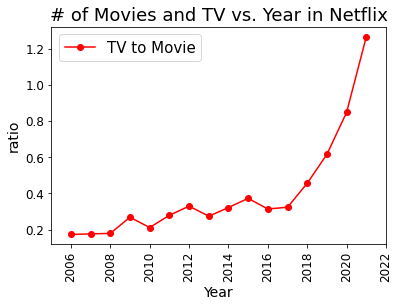

In [122]:
#TV to Movie Ratio

plt.plot(groupby_tv[0], groupby_tv[1]/groupby_movie[1], 'r', marker='o')

plt.xlabel("Year", size=14)
plt.xticks(fontsize=12, rotation=90)
plt.xlim(2005, 2022)
plt.ylabel("ratio", size=14)
plt.yticks(fontsize=12)

plt.title("# of Movies and TV vs. Year in Netflix", size=18)

plt.legend(['TV to Movie'], loc='upper left', fontsize=15)

plt.savefig("./Images/TV_To_Movie_Ratio.png");

# TV Show and Movie in America
    * Bar graph, showing the trend of TV shows and movies only in America

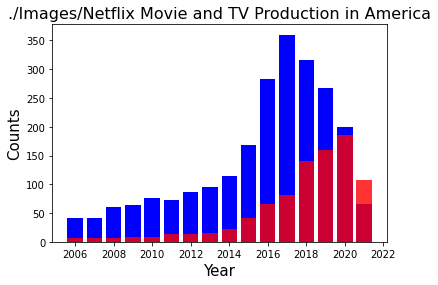

In [112]:
#movie_duration_df = netflix.loc[netflix['type'] == 'Movie'][['type', 'country', 'duration']].dropna(axis=0)
#TV_duration_df = netflix.loc[netflix['type'] == 'TV Show'][['type', 'country', 'duration']].dropna(axis=0)

#for index, row in temp.iterrows():
america = []
korea = []
china = []
india = []
unitedk = []
southaf = []

for index, row in netflix_df.iterrows():
    if 'United States' in netflix_df.loc[index, 'country'].split(", "):
        america.append(netflix_df.loc[index, :])
    elif 'South Korea' in netflix_df.loc[index, 'country'].split(", "):
        korea.append(netflix_df.loc[index, :])
    elif 'China' in netflix_df.loc[index, 'country'].split(", "):
        china.append(netflix_df.loc[index, :]) 
    elif 'India' in netflix_df.loc[index, 'country'].split(", "):
        india.append(netflix_df.loc[index, :]) 
    elif 'United Kingdom' in netflix_df.loc[index, 'country'].split(", "):
        unitedk.append(netflix_df.loc[index, :])
    elif 'South Africa' in netflix_df.loc[index, 'country'].split(", "):
        southaf.append(netflix_df.loc[index, :])    
        
america_df = pd.DataFrame(america)
korea_df = pd.DataFrame(korea)
china_df = pd.DataFrame(china)
india_df = pd.DataFrame(india)
unitedk_df = pd.DataFrame(unitedk)
southaf_df = pd.DataFrame(southaf)

result_df = america_df

# list of movie and tv by year and type
movie_maps1 = []
tv_maps1 = []

# Store Type and Year into movie_maps and tv_maps 
for index, row in result_df.iterrows():
    if result_df.loc[index, 'release_year'] > 2005 and result_df.loc[index, 'type'] == "Movie":
        movie_maps1.append([result_df.loc[index, 'release_year'], result_df.loc[index, 'type']])
        
    elif result_df.loc[index, 'release_year'] > 2005 and result_df.loc[index, 'type'] == "TV Show":
        tv_maps1.append([result_df.loc[index, 'release_year'], result_df.loc[index, 'type']])


tv_df1 = pd.DataFrame(tv_maps1)
movie_df1 = pd.DataFrame(movie_maps1)

groupby_tv1 = tv_df1.groupby(0).count().reset_index() 
groupby_movie1 = movie_df1.groupby(0).count().reset_index() 

merge_df1 = groupby_tv1.merge(groupby_movie1, left_on=0, right_on=0)
merge_df1.rename(columns = {0:'Year', '1_x':'TV', '1_y':'Movie'}, inplace = True)


plt.bar(merge_df1['Year'], merge_df1['Movie'], color='b')
plt.bar(merge_df1['Year'], merge_df1['TV'], color='r', alpha=0.8)
plt.xlabel("Year", size=15)
plt.ylabel("Counts", size=15)
plt.title("./Images/Netflix Movie and TV Production in America", size=16)
plt.show()


# Ratio of TV shows to Movies. Comparison of world to America
    * line graph

# TV to Movie ratio by year. Compare world to America. 

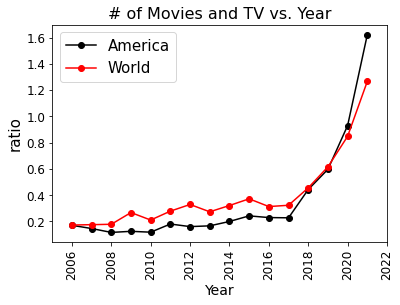

In [113]:
merge_df1['ratio_america']= merge_df1['TV']/merge_df1['Movie']
plt.plot(merge_df1['Year'], merge_df1['ratio_america'], color='black', marker='o')

plt.xlabel("Year", size=14)
plt.xticks(fontsize=12, rotation=90)
plt.xlim(2005, 2022)
plt.ylabel("ratio", size=15)
plt.yticks(fontsize=12)

plt.plot(groupby_tv[0], groupby_tv[1]/groupby_movie[1], 'r', marker='o')
plt.title("# of Movies and TV vs. Year", size=16)

plt.legend(['America', 'World'], loc='upper left', fontsize=15)

plt.savefig("./Images/TV_To_Movie_Ratio_America.png");



In [114]:
# Dataset import
netflix_path = "./Resources/netflix_titles.csv"
netflix_df = pd.read_csv(netflix_path)
netflix_df = netflix_df.dropna()

netflix_sortbyyear_df = netflix_df.sort_values(by=['release_year'], ascending=False)
netflix_sortbyyear_df

df_2018 = netflix_sortbyyear_df.loc[netflix_sortbyyear_df['release_year'] == 2018]
df_2019 = netflix_sortbyyear_df.loc[netflix_sortbyyear_df['release_year'] == 2019]
df_2020 = netflix_sortbyyear_df.loc[netflix_sortbyyear_df['release_year'] == 2020]
df_2021 = netflix_sortbyyear_df.loc[netflix_sortbyyear_df['release_year'] == 2021]

country_2018 = pd.DataFrame(df_2018['country'].value_counts())
country_2019 = pd.DataFrame(df_2019['country'].value_counts())
country_2020 = pd.DataFrame(df_2020['country'].value_counts())
country_2021 = pd.DataFrame(df_2021['country'].value_counts())

netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...


# Netflix production by country

Number of Shows in 2019: 381
Number of Shows in 2020: 349
Number of Shows in 2021: 83


,release_year
rating,
PG,26260
PG-13,36360
R,92920
TV-14,151500
TV-G,36360
TV-MA,422180
TV-PG,54540
TV-Y,50500
TV-Y7,22220


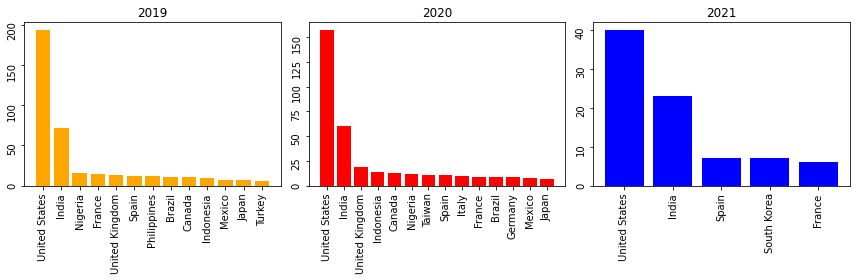

In [115]:
# Print Number of Shows from 2019 to 2021
print(f"Number of Shows in 2019: {country_2019.loc[country_2019['country'] > 5].sum()[0]}")
print(f"Number of Shows in 2020: {country_2020.loc[country_2020['country'] > 5].sum()[0]}")
print(f"Number of Shows in 2021: {country_2021.loc[country_2021['country'] > 5].sum()[0]}")

fig1, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))

df1=(country_2019.loc[country_2019['country'] > 5])
ax1.bar(df1.index, df1['country'], color='orange')
ax1.tick_params(labelrotation=90)
ax1.set_title("2019")

df2=(country_2020.loc[country_2020['country'] > 5])
ax2.bar(df2.index, df2['country'], color='r')
ax2.tick_params(labelrotation=90)
ax2.set_title("2020")

df3=(country_2021.loc[country_2021['country'] > 5])
ax3.bar(df3.index, df3['country'], color='b')
ax3.tick_params(labelrotation=90)
ax3.set_title("2021")

fig1.tight_layout()

plt.savefig("./Images/Country_Production.png")

df_2020.groupby('rating').sum()

# Percentage of netflix production by rating

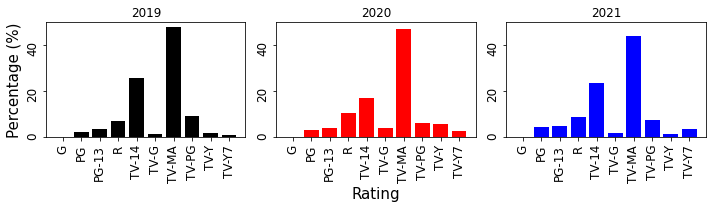

In [123]:
fig2, (ax4, ax5, ax6) = plt.subplots(1, 3, figsize=(10,3))

rating_2018 = df_2019.groupby('rating').sum()
rating_2019 = df_2019.groupby('rating').sum()/1047861*100
rating_2020 = df_2020.groupby('rating').sum()/892840*100
rating_2021 = df_2021.groupby('rating').sum()/325381*100

new_index = ['G', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'TV-Y', 'TV-Y7']

rating_2020 = pd.DataFrame(rating_2020['release_year'], index=new_index)
rating_2021 = pd.DataFrame(rating_2021['release_year'], index=new_index)
rating_2020 = rating_2020.fillna(0)
rating_2021 = rating_2021.fillna(0)

ax4.bar(rating_2019.index, rating_2019['release_year'], color='black')
ax4.set_ylim(0, 50)
ax4.set_ylabel("Percentage (%)", size=15)
ax4.tick_params(labelrotation=90, labelsize=12)
ax4.set_title("2019")

ax5.bar(rating_2020.index, rating_2020['release_year'], color='r')
ax5.set_xlabel("Rating", size=15)
ax5.set_ylim(0, 50)
ax5.tick_params(labelrotation=90, labelsize=12)
ax5.set_title("2020")

ax6.bar(rating_2021.index, rating_2021['release_year'], color='b')
ax6.set_ylim(0, 50)
ax6.tick_params(labelrotation=90, labelsize=12)
ax6.set_title("2021")

fig2.tight_layout()
plt.savefig("./Images/Rating.png")
plt.show()



# Trend of netflix production by rating

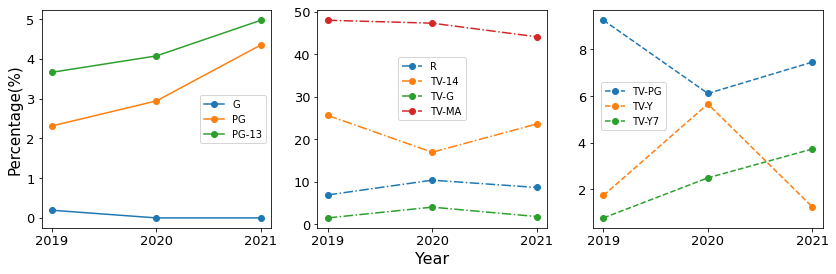

In [124]:
# Merge rating data frames from 2019 to 2021
temp_df = pd.merge(rating_2019, rating_2020, left_index=True, right_index=True)
merged_df = pd.merge(temp_df, rating_2021, left_index=True, right_index=True)
merged_df = merged_df.rename(columns={'release_year_x': '2019',
                                      'release_year_y': '2020',
                                      'release_year': '2021'})

fig3, (ax7, ax8, ax9) = plt.subplots(1, 3, figsize=(14,4))
    
ax7.plot(merged_df.T.iloc[:, 0:3], marker='o')
ax7.legend(merged_df.T.iloc[:, 0:3])
ax7.set_ylabel("Percentage(%)", size=15)
ax7.tick_params(labelsize=13)

ax8.plot(merged_df.T.iloc[:, 3:7], marker='o', linestyle='-.')
ax8.legend(merged_df.T.iloc[:, 3:7], loc='center', bbox_to_anchor=(0.5, 0.64))
ax8.set_xlabel("Year", size=16)
ax8.tick_params(labelsize=13)

ax9.plot(merged_df.T.iloc[:, 7:11], marker='o', linestyle='dashed')
ax9.legend(merged_df.T.iloc[:, 7:11], bbox_to_anchor=(0.34, 0.56))
ax9.tick_params(labelsize=13)

plt.savefig("./Images/Line_RatingbyYear.png")


# Pie chart - Rolly

In [118]:
# Study data files
titles_path = "./Resources/netflix_titles.csv"

titles_df = pd.read_csv(titles_path)
titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [119]:
# cleaning data

for i in titles_df.columns:
    null_rate = titles_df[i].isna().sum() / len(titles_df) * 100 
        
titles_df['country'] = titles_df['country'].fillna(titles_df['country'].mode()[0])
titles_df['cast'].replace(np.nan, 'No Data',inplace  = True)
titles_df['director'].replace(np.nan, 'No Data',inplace  = True)

titles_df.dropna(inplace=True)
titles_df.drop_duplicates(inplace= True)   

titles_df["date_added"] = pd.to_datetime(titles_df['date_added'])
titles_df['month_added']=titles_df['date_added'].dt.month
titles_df['month_name_added']=titles_df['date_added'].dt.month_name()
titles_df['year_added'] = titles_df['date_added'].dt.year

titles_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added,year_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Data,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",9,September,2021
1,s2,TV Show,Blood & Water,No Data,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",9,September,2021
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,9,September,2021
3,s4,TV Show,Jailbirds New Orleans,No Data,No Data,United States,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",9,September,2021
4,s5,TV Show,Kota Factory,No Data,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,9,September,2021


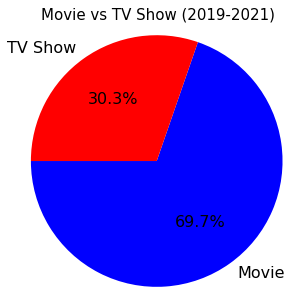

In [120]:
# Count title type, and plot the percentage ratio of movie vs tv show
title_type = titles_df["type"].value_counts()
plt.figure(figsize=(5,5))
plt.title('Movie vs TV Show (2019-2021)', size=15)
pies = ["Movie", "TV Show"]
pie_type = [6126,2664]
colors = ["blue", "red"]

# create a pie chart based upon the above data
plt.pie(pie_type, labels=pies, colors=colors,
        autopct="%1.1f%%", shadow=False, startangle=180, textprops={"fontsize":16})

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig('./Images/%ratio_movie_tvshow.png')
plt.show()

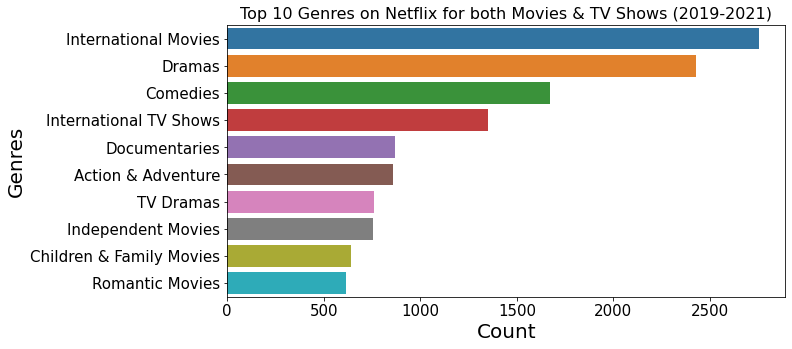

In [121]:
title_genres = titles_df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);
title_genres.count
plt.figure(figsize=(10,5))
genre = sns.countplot(y = title_genres, order=title_genres.value_counts().index[:10])
plt.title('Top 10 Genres on Netflix for both Movies & TV Shows (2019-2021)', size=16)
plt.xlabel('Count', size=20)
plt.xticks(fontsize=15)
plt.ylabel('Genres', size=20)
plt.yticks(fontsize=15)
plt.savefig('./Images/distribution_genres.png')
plt.show()